In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## 酒精产量

In [2]:
df = pd.read_csv("sorghum/ethanol_prod.csv")
display(df)

,Ethanol yield per line after 72h (kg),Ethanol yield per line after 144h\n(kg),Ethanol yield per ha after 72h (kg),Ethanol yield per ha after 144h (kg)
0,0.2701,0.4815,540.2,962.9
1,0.4447,0.7852,889.4,1570.4
2,0.2510,0.4423,502.0,884.5
3,0.1495,0.2580,299.1,516.1
4,0.4073,0.6937,814.6,1387.4
5,0.2156,0.3643,431.2,728.6
6,0.2445,0.4351,489.0,870.2
7,0.2133,0.3626,426.6,725.2
8,0.1996,0.3413,399.2,682.5
9,0.2631,0.4961,526.3,992.1


In [3]:
def one_way(column):
    display(df.keys()[column])
    df1 = pd.DataFrame(np.zeros([4,6], np.float32), columns=[str(x+1) for x in range(6)])
    i = 0
    # 每列每4个元素属于一个品种
    for c in range(6):
        for r in range(4):
            df1.iloc[r, c] = df.iloc[c*4 + r,column]
    display(df1)

    mx = pd.DataFrame(np.zeros([6,6], np.float32), index=df1.keys(), columns=df1.keys())
    for k1 in df1.keys():
        for k2 in df1.keys():
            Fv, pv = stats.f_oneway(df1[k1], df1[k2])
            mx[k1][k2] = pv
    display(mx)
    display('p <= 0.05:')
    display(mx<=0.05)
    display('p <= 0.01:')
    display(mx<=0.01)

In [9]:
one_way(0)

'Ethanol yield per line after 72h (kg)'

,1,2,3,4,5,6
0,0.2701,0.4073,0.1996,0.3718,0.4240,0.2683
1,0.4447,0.2156,0.2631,0.4570,0.2905,0.2756
2,0.2510,0.2445,0.3431,0.3016,0.4151,0.4632
3,0.1495,0.2133,0.2459,0.2657,0.4714,0.3291


,1,2,3,4,5,6
1,1.000000,0.913989,0.823409,0.381943,0.144742,0.495465
2,0.913989,1.000000,0.899580,0.254688,0.074205,0.361139
3,0.823409,0.899580,1.000000,0.147010,0.030678,0.236922
4,0.381943,0.254688,0.147010,1.000000,0.404987,0.816572
5,0.144742,0.074205,0.030678,0.404987,1.000000,0.307691
6,0.495465,0.361139,0.236922,0.816572,0.307691,1.000000


'p <= 0.05:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,True,False,False,False
6,False,False,False,False,False,False


'p <= 0.01:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


In [11]:
one_way(1)

'Ethanol yield per line after 144h\n(kg)'

,1,2,3,4,5,6
0,0.4815,0.6937,0.3413,0.6143,0.6584,0.4514
1,0.7852,0.3643,0.4961,0.7087,0.4811,0.4594
2,0.4423,0.4351,0.5699,0.4880,0.6855,0.7610
3,0.2580,0.3626,0.4720,0.4302,0.7904,0.5611


,1,2,3,4,5,6
1,1.000000,0.842962,0.860135,0.605910,0.248197,0.629686
2,0.842962,1.000000,0.950824,0.374076,0.110153,0.410022
3,0.860135,0.950824,1.000000,0.294043,0.060999,0.345590
4,0.605910,0.374076,0.294043,1.000000,0.337287,0.983366
5,0.248197,0.110153,0.060999,0.337287,1.000000,0.360118
6,0.629686,0.410022,0.345590,0.983366,0.360118,1.000000


'p <= 0.05:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


'p <= 0.01:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


In [12]:
one_way(2)

'Ethanol yield per ha after 72h (kg)'

,1,2,3,4,5,6
0,540.200012,814.599976,399.200012,743.700012,848.099976,536.599976
1,889.400024,431.200012,526.299988,914.000000,581.099976,551.200012
2,502.000000,489.000000,686.299988,603.299988,830.200012,926.400024
3,299.100006,426.600006,491.799988,531.400024,942.900024,658.200012


,1,2,3,4,5,6
1,1.000000,0.913858,0.823537,0.381812,0.144634,0.495520
2,0.913858,1.000000,0.899934,0.254543,0.074137,0.361139
3,0.823537,0.899934,1.000000,0.147039,0.030680,0.237115
4,0.381812,0.254543,0.147039,1.000000,0.404857,0.816268
5,0.144634,0.074137,0.030680,0.404857,1.000000,0.307433
6,0.495520,0.361139,0.237115,0.816268,0.307433,1.000000


'p <= 0.05:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,True,False,False,False
6,False,False,False,False,False,False


'p <= 0.01:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


In [13]:
one_way(3)

'Ethanol yield per ha after 144h (kg)'

,1,2,3,4,5,6
0,962.900024,1387.400024,682.500000,1228.699951,1316.800049,902.900024
1,1570.400024,728.599976,992.099976,1417.300049,962.099976,918.700012
2,884.500000,870.200012,1139.900024,975.900024,1371.099976,1522.000000
3,516.099976,725.200012,944.000000,860.400024,1580.699951,1122.199951


,1,2,3,4,5,6
1,1.000000,0.843025,0.860136,0.605892,0.248185,0.629608
2,0.843025,1.000000,0.950933,0.374129,0.110180,0.410020
3,0.860136,0.950933,1.000000,0.294096,0.061033,0.345575
4,0.605892,0.374129,0.294096,1.000000,0.337297,0.983466
5,0.248185,0.110180,0.061033,0.337297,1.000000,0.360188
6,0.629608,0.410020,0.345575,0.983466,0.360188,1.000000


'p <= 0.05:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


'p <= 0.01:'

,1,2,3,4,5,6
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


## ethanol vs weight loss

In [4]:
df_ethanol = pd.read_csv("sorghum/ethanol_prod.csv")

df = pd.read_csv("sorghum/weight_loss.csv")
df = df.loc[:, 'Var 1_72h':'Var 6_144h']
df = df.apply(lambda x: x.astype(str).str.replace(',','.').astype(float))
df

,Var 1_72h,Var 2_72h,Var 3_72h,Var 4_72h,Var 5_72h,Var 6_72h,Var 1_144h,Var 2_144h,Var 3_144h,Var 4_144h,Var 5_144h,Var 6_144h
0,0.46,0.43,0.48,0.59,0.63,0.55,NaN,NaN,NaN,NaN,NaN,NaN
1,0.64,0.70,0.59,0.83,0.89,0.58,NaN,1.06,0.84,1.20,NaN,0.79
2,0.49,0.44,0.56,0.59,0.65,0.53,0.76,0.64,0.83,NaN,0.96,NaN
3,0.50,0.62,0.60,0.63,0.64,0.62,0.80,NaN,0.94,0.95,NaN,0.87
4,0.52,0.48,0.53,0.64,0.72,0.64,0.84,0.78,0.86,0.98,1.08,1.05
5,0.57,0.65,0.59,0.70,0.65,0.69,0.86,1.01,0.98,0.98,0.95,1.12
6,0.50,0.64,0.64,0.95,0.69,0.69,0.79,1.02,1.10,1.49,1.07,1.04
7,0.46,0.55,0.60,0.65,0.72,0.64,0.85,0.90,1.05,1.03,1.12,1.06
8,0.46,0.64,0.62,0.69,0.76,0.63,0.82,1.09,1.06,1.14,1.18,1.06
9,0.64,0.58,0.61,0.69,0.61,0.63,1.13,0.98,1.15,1.07,1.01,1.05


In [7]:
avg_weight_loss = df.mean(axis=0)
avg_72 = avg_weight_loss.loc['Var 1_72h':'Var 6_72h']
avg_144 = avg_weight_loss.loc['Var 1_144h':'Var 6_144h']
display(avg_72)
display(avg_144)

Var 1_72h    0.514167
Var 2_72h    0.576667
Var 3_72h    0.585833
Var 4_72h    0.689167
Var 5_72h    0.691667
Var 6_72h    0.614167
dtype: float64

Var 1_144h    0.847000
Var 2_144h    0.955000
Var 3_144h    0.998182
Var 4_144h    1.096000
Var 5_144h    1.066667
Var 6_144h    1.000000
dtype: float64

In [5]:
def avg_ethanol(column):
    display(df_ethanol.keys()[column])
    df1 = pd.DataFrame(np.zeros([4,6], np.float32), columns=[str(x+1) for x in range(6)])
    i = 0
    # 每列每4个元素属于一个品种
    for c in range(6):
        for r in range(4):
            df1.iloc[r, c] = df_ethanol.iloc[c*4 + r,column]
    display(df1)
    avg = df1.mean(axis=0)
    display(avg)
    ethanol_weight_loss = pd.DataFrame({'ethanol': avg.values, 'weight_loss': avg_72.values if column==0 else avg_144.values})
    # 相关系数，显著性区别
    stat = stats.pearsonr(ethanol_weight_loss['ethanol'], ethanol_weight_loss['weight_loss'])
    display(stat)
    sns.regplot(x='ethanol', y='weight_loss', data=ethanol_weight_loss)

'Ethanol yield per line after 72h (kg)'

,1,2,3,4,5,6
0,0.2701,0.4073,0.1996,0.3718,0.4240,0.2683
1,0.4447,0.2156,0.2631,0.4570,0.2905,0.2756
2,0.2510,0.2445,0.3431,0.3016,0.4151,0.4632
3,0.1495,0.2133,0.2459,0.2657,0.4714,0.3291


1    0.278825
2    0.270175
3    0.262925
4    0.349025
5    0.400250
6    0.334050
dtype: float32

(0.8489741103440046, 0.03249086790268201)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


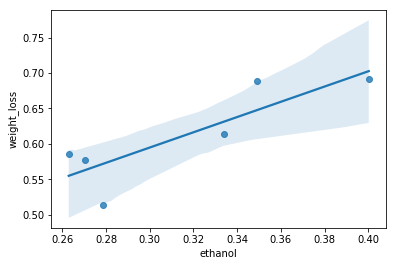

In [8]:
avg_ethanol(0)

'Ethanol yield per line after 144h\n(kg)'

,1,2,3,4,5,6
0,0.4815,0.6937,0.3413,0.6143,0.6584,0.4514
1,0.7852,0.3643,0.4961,0.7087,0.4811,0.4594
2,0.4423,0.4351,0.5699,0.4880,0.6855,0.7610
3,0.2580,0.3626,0.4720,0.4302,0.7904,0.5611


1    0.491750
2    0.463925
3    0.469825
4    0.560300
5    0.653850
6    0.558225
dtype: float32

(0.6303501112327832, 0.17970688773081286)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


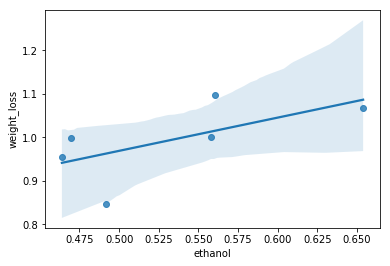

In [9]:
avg_ethanol(1)